# Loan Default Prediction
Given historical data of loan defaults, predict the probability of default for future loans.

## Data Set Information ([link](https://www.openintro.org/data/index.php?data=loans_full_schema)):
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

## Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. `loan_status` is the column we are trying to predict.

| | Column | Data Type | Description |
| --- | --- | --- | --- |
| 1.  | loan_amnt            | number | Listed amount of the loan applied for by the borrower |
| 2.  | term                 | string | Number of payments on the loan. Values are in months can be either 36 or 60 |
| 3.  | int_rate             | number | Interest rate of the loan |
| 4.  | installment          | number | Monthly payment owed by the borrower |
| 5.  | grade                | string | LC assigned loan grade |
| 6.  | sub_grade            | string | LC assigned loan sub-grade |
| 7.  | emp_title            | string | The job title supplied supplied by the borrower when applying for the loan |
| 8.  | emp_length           | string | Employment length in years, rounded down, capped at 10 |
| 9.  | home_ownership       | string | The home ownership status provided by the borrower, can be RENT, OWN, MORTGAGE, OTHER |
| 10. | annual_inc           | number | The self-reported annual income provided by the borrower |
| 11. | verification_status  | string | Indicates if income was verified by LC, not verified, or if the income source was verified |
| 12. | issue_d              | string | The month in which the loan was funded |
| 13. | loan_status          | string | Current status of the loan |
| 14. | purpose              | string | A category provided by the borrower for the loan request |
| 15. | title                | string | The loan title provided by the borrower |
| 16. | dti                  | number | Debt-to-income ratio of borrower (excludes mortgage) |
| 17. | earliest_cr_line     | string | The month the borrower's earliest reported credit line was opened |
| 18. | open_acc             | number | The number of open credit lines in the borrower's credit file |
| 19. | pub_rec              | number | Number of derogatory public records |
| 20. | revol_bal            | number | Total credit revolving balance |
| 21. | revol_util           | number | Revolving line utilization rate, or the amount of credit used relative to all available revolving credit |
| 22. | total_acc            | number | The total number of credit lines currently in the borrower's credit file |
| 23. | initial_list_status  | string | The initial listing status of the loan |
| 24. | application_type     | string | Indicates whether the loan is an individual or joint application |
| 25. | mort_acc             | number | Number of mortgage accounts |
| 26. | pub_rec_bankruptcies | number | Number of public record bankruptcies |
| 27. | address              | string | Address of borrower's residence |

---
## 1. Load the data set

In [1]:
import numpy as np
import pandas as pd

# supress using scientific notation
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv('../DATA/lending_club_loans.csv')
print(df.shape)
df.head()

(396030, 27)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
# basic information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


---
## 2. Exploratory data exploration

In [5]:
# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})

### Class balance

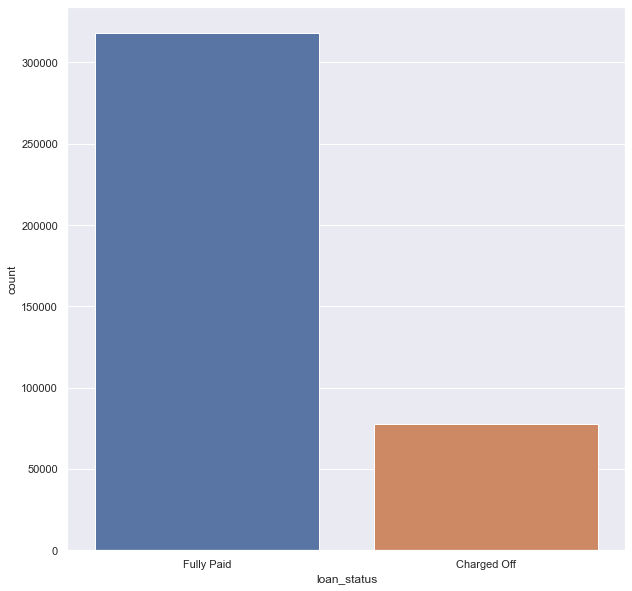

In [6]:
sns.countplot(x='loan_status', data=df)
plt.show()

### Loan amount

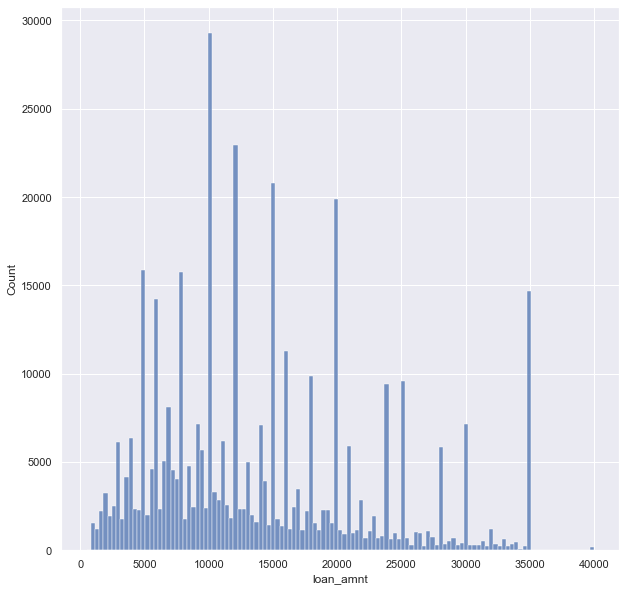

In [7]:
sns.histplot(x=df.loan_amnt)
plt.show()

### Feature correlation

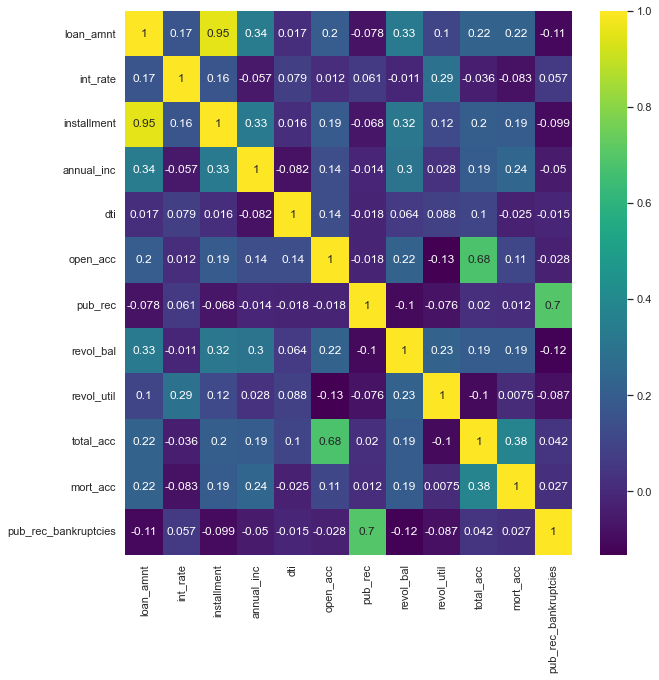

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

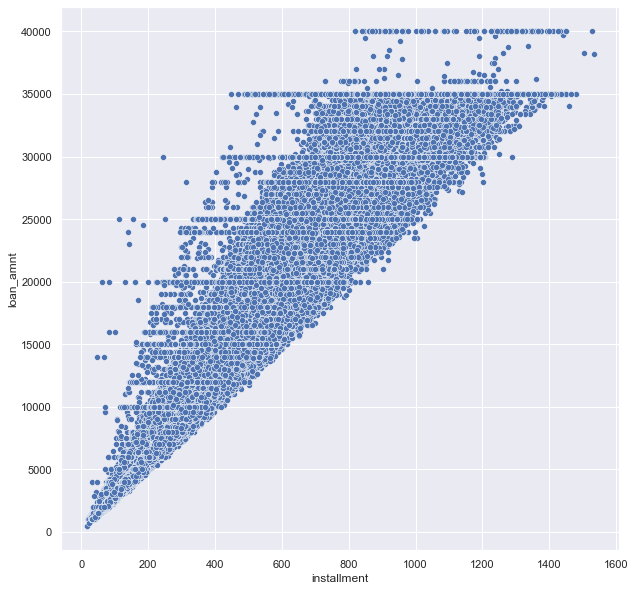

In [9]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)
plt.show()

### Loan status vs loan amount

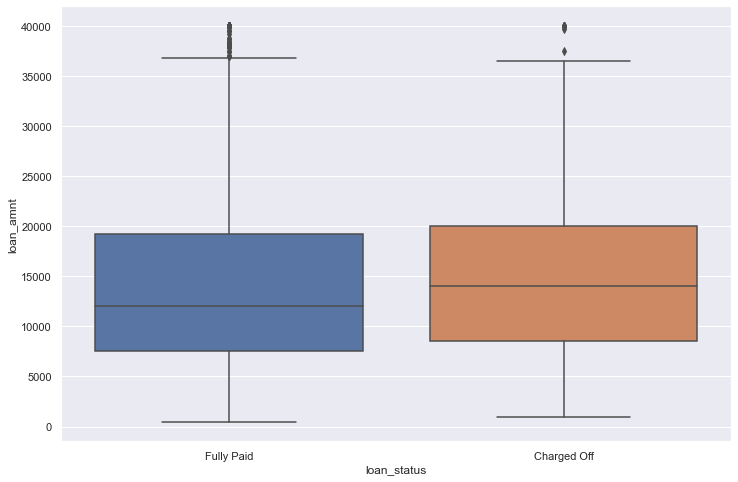

In [10]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.show()

In [11]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


### Loan grades

In [12]:
print(sorted(df.grade.unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [13]:
print(sorted(df.sub_grade.unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


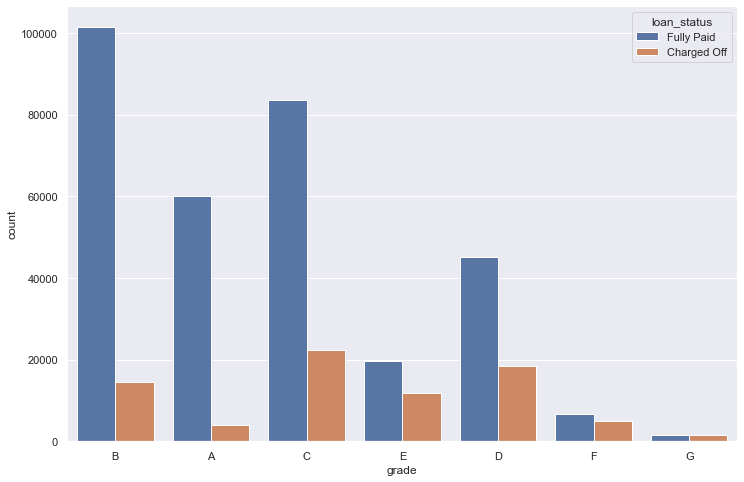

In [14]:
sns.countplot(x='grade', hue='loan_status', data=df)
plt.show()

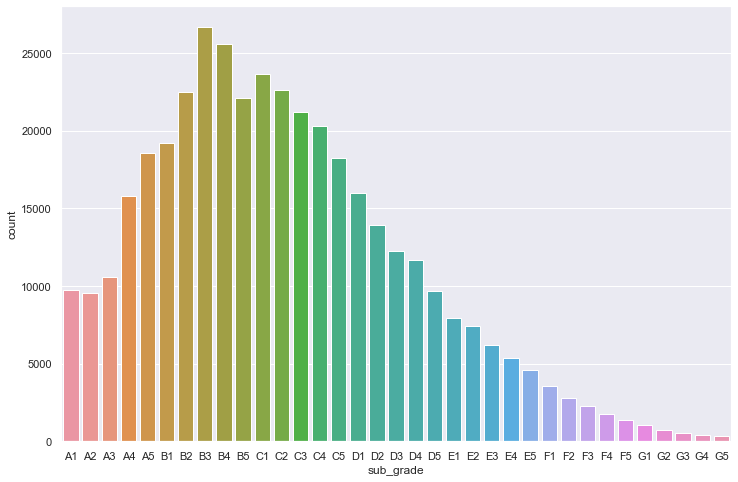

In [15]:
sns.countplot(x='sub_grade', data=df, order=sorted(df.sub_grade.unique()), hue=None)
plt.show()

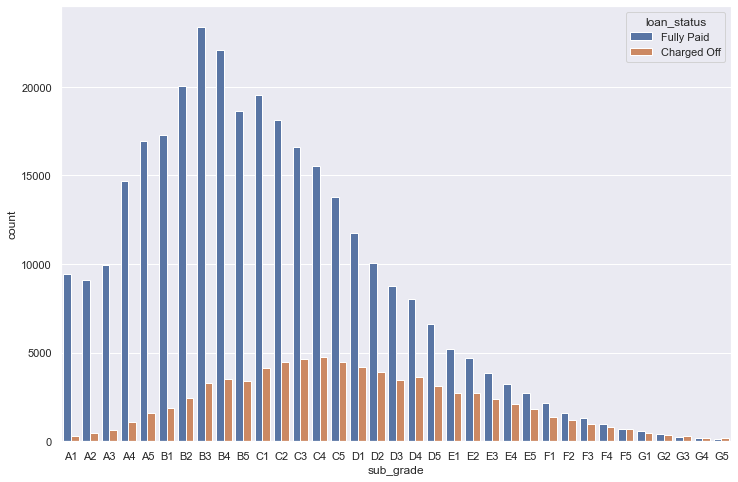

In [16]:
sns.countplot(x='sub_grade', data=df, order=sorted(df.sub_grade.unique()), hue='loan_status')
plt.show()

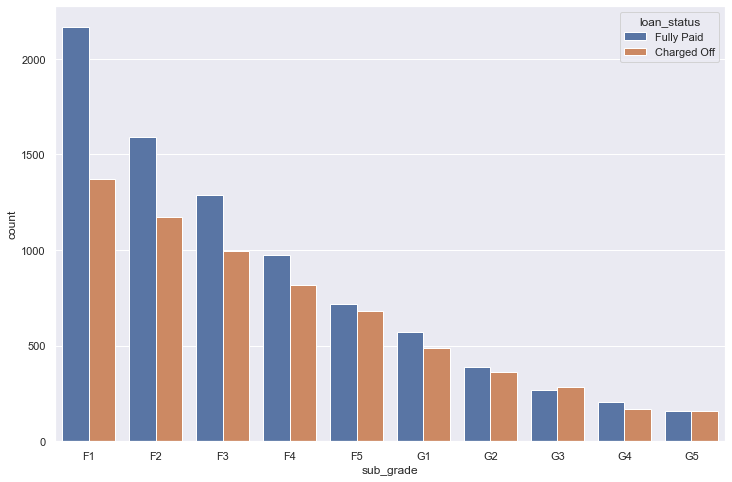

In [17]:
sns.countplot(
    x='sub_grade',
    data=df[(df['grade'] == 'F') | (df['grade'] == 'G')],
    order=['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
    hue='loan_status'
)
plt.show()

### Correlation to target

In [18]:
df['loan_repaid'] = df['loan_status'].apply(lambda status: 0 if status == 'Charged Off' else 1)

In [19]:
df[['loan_repaid', 'loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


<AxesSubplot:>

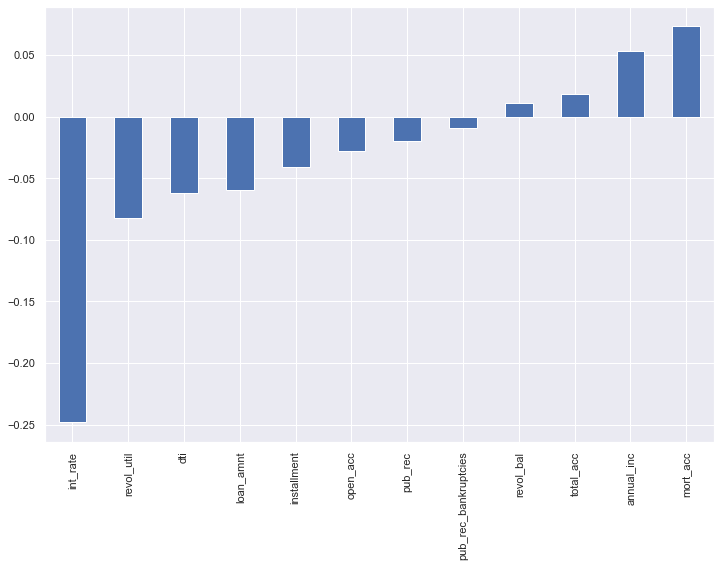

In [20]:
df.corr()['loan_repaid'].sort_values(ascending=True).iloc[:-1].plot(kind='bar')

---
## 3. Data preparation

In [21]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [22]:
# check for duplicate rows
df.duplicated().sum()

0

In [23]:
# check for missing values
df.isna().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
dti                         0
address                     0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
loan_amnt                   0
term                        0
purpose                     0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
loan_repaid                 0
dtype: int64

In [24]:
df.isnull().mean().sort_values(ascending=False)

mort_acc                0.095435
emp_title               0.057892
emp_length              0.046211
title                   0.004431
pub_rec_bankruptcies    0.001351
revol_util              0.000697
dti                     0.000000
address                 0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
loan_amnt               0.000000
term                    0.000000
purpose                 0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
loan_repaid             0.000000
dtype: float64

### Replace missing values

#### `emp_title`

In [25]:
df.emp_title.nunique()

173105

In [26]:
df.emp_title.value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

Since there are so many different titles, we will drop this column

In [27]:
df.drop('emp_title', axis=1, inplace=True)

#### `emp_length`

In [28]:
print(sorted(df.emp_length.dropna().unique()))

['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year']


In [29]:
# order in which to display categories in plots
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

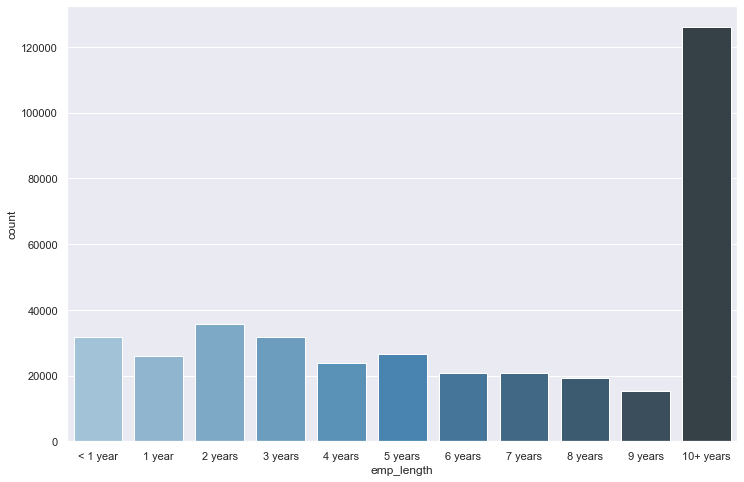

In [30]:
sns.countplot(x='emp_length', data=df, order=emp_length_order, palette='Blues_d')
plt.show()

What is the relationship between employment length and repayment rates?

In [31]:
df.groupby('emp_length').loan_repaid.mean()

emp_length
1 year       0.800865
10+ years    0.815814
2 years      0.806738
3 years      0.804769
4 years      0.807615
5 years      0.807813
6 years      0.810806
7 years      0.805226
8 years      0.800240
9 years      0.799530
< 1 year     0.793128
Name: loan_repaid, dtype: float64

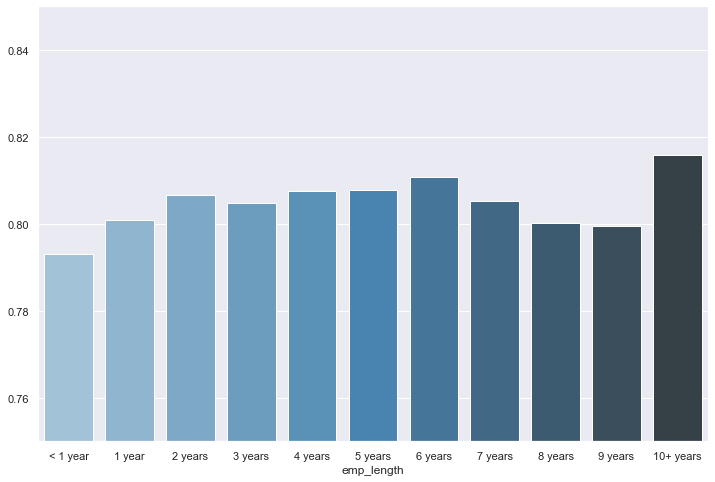

In [32]:
_ = df.groupby('emp_length').loan_repaid.mean()

sns.barplot(x=_.index, y=_.values, order=emp_length_order, palette='Blues_d')
plt.ylim(.75,.85)
plt.show()

The relationship does not appear meaningful, so we will drop this column.

In [33]:
df.drop('emp_length', axis=1, inplace=True)

Which other columns are left?

In [34]:
df.isnull().sum().sort_values(ascending=False)

mort_acc                37795
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
earliest_cr_line            0
address                     0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
dti                         0
term                        0
purpose                     0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
loan_repaid                 0
dtype: int64

#### `title`

`title` seems to be very similar to the `purpose` column

In [35]:
df[['purpose', 'title']].head()

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance


Since `purpose` has no null values, let's drop the `title` column.

In [36]:
df.drop('title', axis=1, inplace=True)

#### `mort_acc`
Number of mortgage accounts

In [37]:
df.mort_acc.value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

Are there any other columns that correlate with `mort_acc`?

In [38]:
df.corr().mort_acc.sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [39]:
df.groupby('total_acc').mean().mort_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

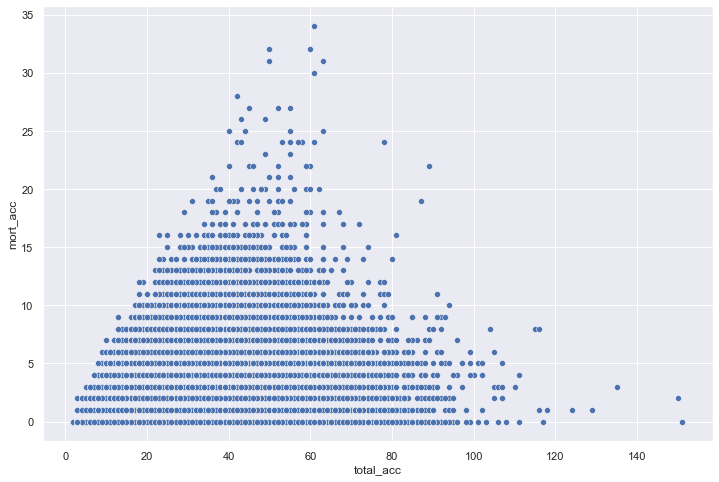

In [40]:
sns.scatterplot(x='total_acc', y='mort_acc', data=df)
plt.show()

Let's use `total_acc` to impute `mort_acc`.

What are the mean values of `mort_acc` for each value of `total_acc`?

In [41]:
# get average mort_acc for each total_acc category
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
# what is the mean mort_acc for total_acc = 2?
total_acc_avg[2.0]

0.0

For each missing value in `mort_acc`, we will impute the mean value of `mort_acc` for the corresponding `total_acc`.

In [42]:
# impute mort_acc based on total_acc
df['mort_acc'] = df.apply(
    lambda row: total_acc_avg[row['total_acc']]  # use total_acc_avg
    if np.isnan(row['mort_acc'])  # if mort_acc is missing
    else row['mort_acc'],  # else use mort_acc
    axis=1
)

df.isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies    535
revol_util              276
loan_amnt                 0
earliest_cr_line          0
address                   0
mort_acc                  0
application_type          0
initial_list_status       0
total_acc                 0
revol_bal                 0
pub_rec                   0
open_acc                  0
dti                       0
term                      0
purpose                   0
loan_status               0
issue_d                   0
verification_status       0
annual_inc                0
home_ownership            0
sub_grade                 0
grade                     0
installment               0
int_rate                  0
loan_repaid               0
dtype: int64

What other columns are left?

`revol_util` and `pub_rec_bankruptcies` have missing data points, but they account for less than 0.5% of the data, so it's fine to simply remove any rows with missing values.

In [43]:
df.dropna(inplace=True)
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical variables

In [44]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### `term`
Convert this column into either a 36 or 60 integer

In [45]:
# split string and take word before first space
df.term = df.term.apply(lambda x: int(x.split(' ')[1]))

#### `grade`
We already know that `grade` is a part of `sub_grade`, so just drop the grade feature

In [46]:
df.drop('grade', axis=1, inplace=True)

#### `sub_grade`
Use one-hot encoding for the `sub_grade` column

In [47]:
df = pd.get_dummies(df, prefix='sub_grade', columns=['sub_grade'], drop_first=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5'],
      dtype='object')

#### `verification_status`, `application_type`, `initial_list_status`, `purpose`
One-hot encode these columns too

In [48]:
df = pd.get_dummies(df, prefix='v_s', columns=['verification_status'], drop_first=True)
df = pd.get_dummies(df, prefix='a_t', columns=['application_type'], drop_first=True)
df = pd.get_dummies(df, prefix='i_l_s', columns=['initial_list_status'], drop_first=True)
df = pd.get_dummies(df, prefix='p', columns=['purpose'], drop_first=True)

#### `home_ownership`

In [49]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Combine the `NONE`, `ANY` and `OTHER` values into a single `OTHER` value

In [50]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x in ('NONE', 'ANY') else x)
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [51]:
df = pd.get_dummies(df, prefix='h_o', columns=['home_ownership'], drop_first=True)

#### `address`
Extract the zip code from the `address` column

In [52]:
df['zip_code'] = df.address.apply(lambda x: x.split(' ')[-1])
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [53]:
df = pd.get_dummies(df, prefix='z_c', columns=['zip_code'], drop_first=True)

#### `issue_d`
This would be data leakage, as we wouldn't know beforehand whether or not a loan would be issued, i.e. this feature would not be available when we are trying to predict the loan status.

In [54]:
df.drop('issue_d', axis=1, inplace=True)

#### `earliest_cr_line`
Extract the year

In [55]:
df['earliest_cr_year'] = df.earliest_cr_line.apply(lambda x: int(x.split('-')[-1]))
df['earliest_cr_year'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_year, Length: 65, dtype: int64

In [56]:
df.drop(['earliest_cr_line', 'address', 'loan_status'], axis=1, inplace=True)

In [57]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

---
## 4. Machine learning with scikit-learn

In [58]:
from sklearn.model_selection import train_test_split

from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.linear_model import LogisticRegression

### 4.1. Train/test split

In [59]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

X.shape, y.shape

((395219, 78), (395219,))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.4, random_state=42
)

y_train.shape, y_test.shape

((237131,), (158088,))

### 4.2. Create pipeline

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline

In [83]:
pipe = make_pipeline(
    MinMaxScaler(),
    GradientBoostingClassifier(
        random_state=42,
        n_estimators=200,
        n_iter_no_change=5,
        tol=5e-3,
        verbose=1
    )
)

### 4.3. Fit model

In [84]:
pipe.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9186            2.71m
         2           0.8740            2.72m
         3           0.8418            2.72m
         4           0.8170            2.73m
         5           0.7972            2.72m
         6           0.7810            2.71m
         7           0.7676            2.70m
         8           0.7497            2.67m
         9           0.7394            2.66m
        10           0.7255            2.64m
        20           0.6480            2.49m
        30           0.6118            2.36m
        40           0.5939            2.24m
        50           0.5796            2.10m
        60           0.5692            1.97m
        70           0.5609            1.85m
        80           0.5541            1.71m
        90           0.5488            1.57m
       100           0.5443            1.42m


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(n_estimators=200,
                                            n_iter_no_change=5, random_state=42,
                                            tol=0.001, verbose=1))])

### 4.5. Model evaluation

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [88]:
predictions = pipe.predict(X_test)

In [89]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     30998
           1       0.88      1.00      0.93    127090

    accuracy                           0.89    158088
   macro avg       0.93      0.72      0.77    158088
weighted avg       0.90      0.89      0.87    158088



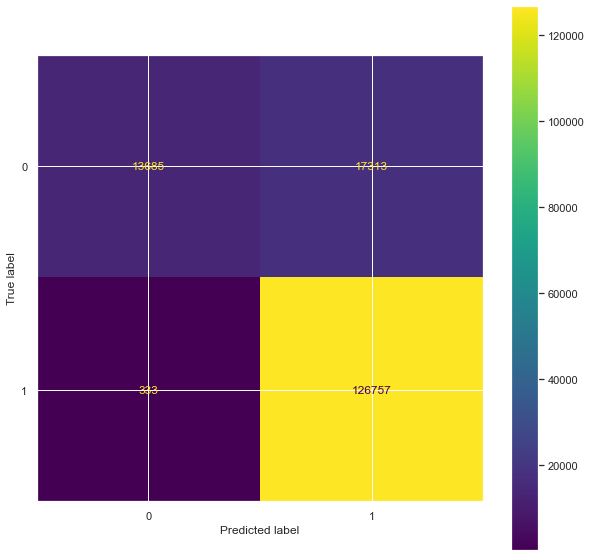

In [90]:
cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

To Do:
Add threshold for the classification